# Sample Analyses for Chapter 10

## Preperations

In [89]:
#Importing modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

In [44]:
#Importing dataset
MyData = pd.read_csv("PetExample.csv")
MyData.head()

,Type,Breed,Weight (lb),Height (in),Sex
0,Cat,Maine Coon,15,11,Male
1,Dog,English Mastiff,223,32,Female
2,Cat,Singapura,6,8,Female
3,Cat,Singapura,4,7,Female
4,Cat,Singapura,8,8,Male


## t-Test

In [48]:
#Preparing the data
SmallCats = MyData[(MyData["Breed"]=="Singapura")]
SmallDogs = MyData[(MyData["Breed"]=="Yorkshire Terrier")]
SmallCats.head()

,Type,Breed,Weight (lb),Height (in),Sex
2,Cat,Singapura,6,8,Female
3,Cat,Singapura,4,7,Female
4,Cat,Singapura,8,8,Male
9,Cat,Singapura,5,8,Female
13,Cat,Singapura,5,7,Female


In [57]:
#Isolating the test variables
SmallCatsWeight = SmallCats["Weight (lb)"]
SmallDogsWeight = SmallDogs["Weight (lb)"]

In [56]:
#Running the analysis
tTestResults = stats.ttest_ind(SmallCatsWeight,SmallDogsWeight)
print(tTestResults)

Ttest_indResult(statistic=2.1530549587998804, pvalue=0.033930048809027155)


In [58]:
#Checking Singapura Mean Weight
SmallCatsWeight.describe()

count    53.000000
mean      6.094340
std       1.362466
min       4.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       8.000000
Name: Weight (lb), dtype: float64

In [59]:
#Checking Yorkshire Terrier Mean Weight
SmallDogsWeight.describe()

count    41.000000
mean      5.536585
std       1.074653
min       4.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       7.000000
Name: Weight (lb), dtype: float64

## Chi Square

In [6]:
#Preparing the data
Contingency = pd.crosstab(MyData["Type"],MyData["Sex"])
print(Contingency)

Sex   Female  Male
Type              
Cat       47    64
Dog       50    38


In [9]:
#Running the analysis
stat,p,dof,expected=stats.chi2_contingency(Contingency)
print(p)

0.059261801629914686


## Correlation

In [11]:
#Preparing the data
PetHeight = MyData["Height (in)"]
PetWeight = MyData["Weight (lb)"]

In [12]:
#Running the analysis
CorrelationResults = stats.pearsonr(PetHeight,PetWeight)
print(CorrelationResults)

(0.9592991777202481, 3.8891158549349756e-110)


## Simple Linear Regression

In [90]:
#Preparing the data
Y = MyData["Height (in)"]
X = MyData["Weight (lb)"]
XConstant = sm.add_constant(X)

In [91]:
#Running the analysis
SimpleLinearRegressionResults = sm.OLS(Y,XConstant).fit()
print(SimpleLinearRegressionResults.summary())

                            OLS Regression Results                            
Dep. Variable:            Height (in)   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2273.
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          3.89e-110
Time:                        17:23:27   Log-Likelihood:                -487.92
No. Observations:                 199   AIC:                             979.8
Df Residuals:                     197   BIC:                             986.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.5104      0.241     35.272      

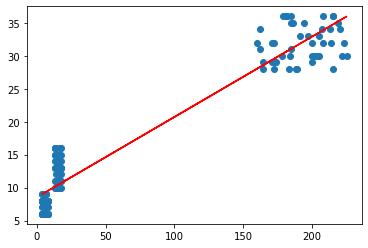

In [92]:
#Plotting the model
plt.scatter(X,Y)
plt.plot(X,8.5104 + 0.1220*X,"r")
plt.show()